### Step 1:Import all the libraries

In [1]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt

### Step 2:Load and Review the Data

In [2]:
df = pd.read_csv("bank-additional-full.csv",sep=";")

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Step 3:Explore the Data

In [4]:
df.shape

(41188, 21)

In [5]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [6]:
# 999 just means 0, acc. to the problem statement
df.pdays.replace(999,0,inplace=True)

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,0.221229,1.348874,0.000,0.000,0.000,0.000,27.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [20]:
df.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [12]:
36548-4640

31908

In [14]:
4640*7

32480

In [16]:
df2=df[df.y=="yes"]
df2.shape

(4640, 21)

In [21]:
df1=df
for i in range(7):
    df1 = df1.append(df2)
df1.y.value_counts()

yes    37120
no     36548
Name: y, dtype: int64

In [22]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

<AxesSubplot:>

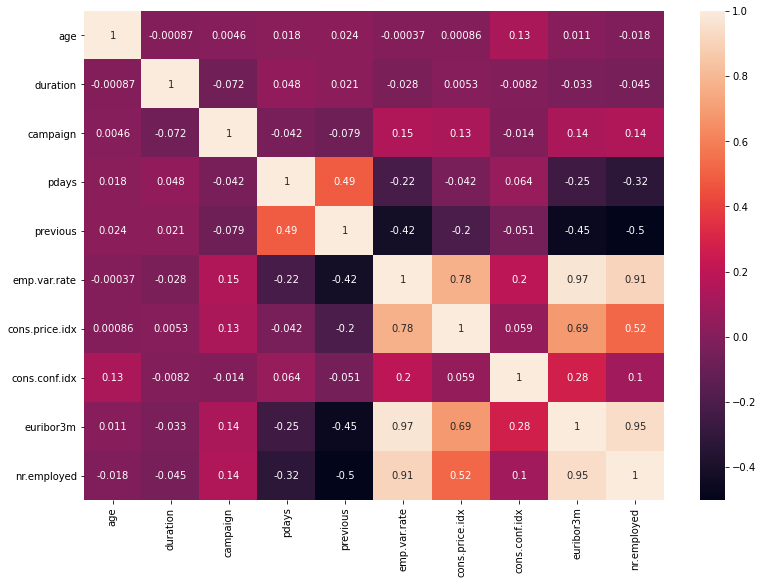

In [23]:
f, ax = plt.subplots(figsize=(13, 9))
sns.heatmap(df.corr(),annot=True)

In [24]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [25]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [26]:
df = pd.get_dummies(df, columns=["loan","job","marital","education","default","housing","contact","month","day_of_week","poutcome"],drop_first=True)
df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,0,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
1,57,149,1,0,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
2,37,226,1,0,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
3,40,151,1,0,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
4,56,307,1,0,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0


### Step 4:Training Data and Testing Data Split

In [27]:
# Create a separate dataframe consisting only of the features i.e independent attributes

X = df.drop(["y"] , axis = 1)
y = df["y"]
X.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,0,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
1,57,149,1,0,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
2,37,226,1,0,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
3,40,151,1,0,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
4,56,307,1,0,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0


In [28]:
# Split X and y into training and test set in 80:20 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Step 5: Fit the model with the Training Data

In [33]:
from sklearn import svm
NNH = svm.SVC(C=3,gamma=0.4,verbose=1)

In [34]:
NNH.fit(X_train, y_train)

[LibSVM]

SVC(C=3, gamma=0.4, verbose=1)

### Step 6:Predict the test data

In [35]:
NNH.score(X_train, y_train)

1.0

In [36]:
NNH.score(X_test, y_test)

0.888443797038116

# With Scaling

In [37]:
from sklearn import svm
NNH1 = svm.SVC()

In [ ]:
# Split X and y into training and test set in 85:15 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

In [ ]:
# run any one scaler technique, here i have used robust scalar

In [ ]:
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()    
x_train= st_x.fit_transform(X_train)    
x_test= st_x.transform(X_test)

In [38]:
from sklearn.preprocessing import RobustScaler
st_x= RobustScaler()    
x_train= st_x.fit_transform(X_train)    
x_test= st_x.transform(X_test)

In [ ]:
from sklearn.preprocessing import Normalizer
st_x= Normalizer()    
x_train= st_x.fit_transform(X_train)    
x_test= st_x.transform(X_test)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
st_x= MinMaxScaler()    
x_train= st_x.fit_transform(X_train)    
x_test= st_x.transform(X_test)

In [ ]:
from sklearn.preprocessing import MaxAbsScaler
st_x= MaxAbsScaler()    
x_train= st_x.fit_transform(X_train)    
x_test= st_x.transform(X_test)

In [39]:
NNH1.fit(x_train, y_train)

SVC()

In [40]:
NNH1.score(x_train, y_train)

0.9219726858877086

In [41]:
NNH1.score(x_test, y_test)

0.9181840252488468